# Assignment 3: Clustering California Housing with K-means

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you (for free) from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [1]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#importing pandas
import pandas as pd
import numpy as np

house = pd.read_csv("housing.csv")
house.head()
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [2]:
#confirmed that the data is here. Will now use deal with categorical variables and empty data

#will fill empty indexes with median values
sample_incomplete_rows = house[house.isnull().any(axis=1)].head()
median = house["total_bedrooms"].median()
house["total_bedrooms"].fillna(median, inplace=True)

#dropping categorical variable
house = house.drop(columns = ["ocean_proximity"])

#adding dummy variables
#house = pd.get_dummies(house, prefix=["ocean_proximity"])
#house.head()

#doing feature scaling
scaler = StandardScaler()

house_p = scaler.fit_transform(house)

names = list(house.columns.values) 
house_p = pd.DataFrame(house_p, columns = names)


#house_p = pd.DataFrame(house_p, columns = names + ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])
house_p.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900


With empty data filled and categorical variables eliminated, I visualize the data:

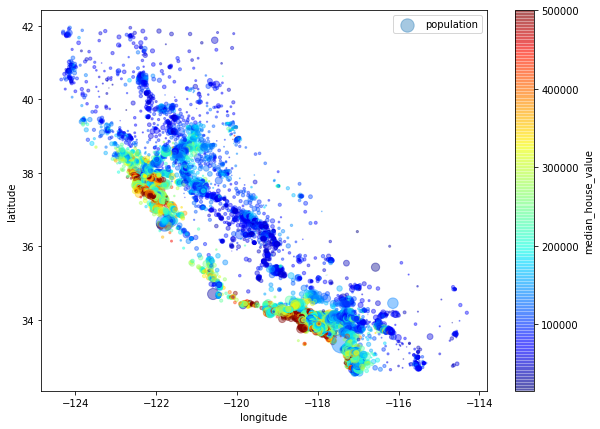

In [66]:
import matplotlib.pyplot as plt
#plotting the data on an x,y coordinate plane
house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=house["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

In terms of location, 3 sort of classes/clusters can be seen. 2 High value areas,and a long rural strip with low house values. Population is harder to describe,though given the concentration in the center, I would say there are 4/5 categories here. These are hypothesis/predictions before I actually run the algorithm.

In [34]:
cor_matrix = house_p.corr()
cor_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [8]:
# Your code goes here for this section.
#data can stay within one group
X_house = house_p
X_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900


In [55]:

centroids = np.array([[1,1,1,1,1,1,1,1,1],[0,0,0,0,0,0,0,0,0]])

#np.linalg.norm(centroids)
#print(np.linalg.norm(X_house - centroids))
#np.sum(np.abs(X_house - centroids)**2,axis=-1)**(1/2)
#np.sqrt(np.sum((X_house - centroids)**2,  axis=1))

eu_distances = []
for j in range(2):
    indiv_distances = np.sqrt(np.sum((X_house - centroids[j])**2,  axis=1))
    eu_distances.append(indiv_distances)  

#distances = np.sqrt(((X_house - centroids[:, np.newaxis])**2).sum(axis=2))
closest = np.argmin(eu_distances, axis=0)
print(np.array([X_house[closest==k].mean(axis=0) for k in range(centroids.shape[0])]))

[0        4.843699
1        3.397501
2        4.389409
3        4.236986
4        4.212540
5        4.517498
6        3.522381
7        3.401986
8        3.673941
9        3.058231
10       3.854210
11       3.171240
12       3.797042
13       4.930802
14       3.978667
15       4.786889
16       4.384091
17       4.729849
18       4.260317
19       4.576495
20       5.213743
21       4.477248
22       4.380052
23       4.707691
24       4.243025
25       5.276269
26       4.940789
27       4.563922
28       4.437524
29       5.290177
           ...   
20610    4.709192
20611    4.834643
20612    5.161552
20613    4.762907
20614    4.345304
20615    5.175264
20616    4.953050
20617    5.424913
20618    5.041797
20619    4.592338
20620    5.178828
20621    4.944567
20622    5.399261
20623    4.845092
20624    4.868331
20625    5.448716
20626    4.984960
20627    5.832843
20628    4.564537
20629    6.590282
20630    4.385179
20631    4.294476
20632    4.491548
20633    4.352301
20634    

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include the Euclidean distance which is:
$d(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}2]{\sum\limits_{i=1}^n|x_i - y_i|^2}$

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [21]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
import random

def Kmeans(data, k):
    feature_count = len(data.columns)
    row_count = len(data.index)
    
    centroids = initcentroids(data, feature_count, k)
    
    #building list for rows class identity
    class_identity = []
    for z in range(row_count):
        class_identity.append(0)
    
    #actual for loop of algorithm
    for i in range(500):
        eu_distances = []
        for j in range(k):
            indiv_distances = np.sqrt(np.sum((X_house - centroids[j])**2,  axis=1))
            eu_distances.append(indiv_distances)    
        #recalculating clusters
        class_identity = getclassifications(eu_distances,k,row_count)
        centroids = getcentroids(data,class_identity, k, row_count)
    return centroids
        

    
#classifying individual rows
#eu_distances are the vectors with distances for each category
#k represents the number of clusters, rows = number of data points
def getclassifications(eu_distances, k, rows):
    
    #classification = []
    #for i in range(rows):
    #    cl = 0
    #    base = eu_distances[0].iloc[i]
    #    for j in range(k):
    #        if(eu_distances[j].iloc[i] < base):
    #            cl = j
    #            base = eu_distances[j].iloc[i]
    #    classification.append(cl)
        
    #return classification
    return np.argmin(eu_distances, axis=0)


#getting array of classifications from centroids and data
def applyingclasses(data, centroids, k):
    
    eu_distances = []
    for j in range(k):
        indiv_distances = np.sqrt(np.sum((X_house - centroids[j])**2,  axis=1))
        eu_distances.append(indiv_distances)
    
    return np.argmin(eu_distances, axis=0)

    
#getting random values for the clusters
def initcentroids(data, feature_count,k):
    mean_vals = data.mean()
    std_vals = data.std()
    
    centroids = []
    
    for i in range(k):
        new_centroid = []
        for z in range(feature_count):
            new_centroid.append(random.gauss(mean_vals[z],std_vals[z]))
        centroids.append(new_centroid)
    return centroids


#getting the std deviations
def getsd(data, centroids, k):
    rows = len(data.index)
    eu_distances = []
    for j in range(k):
        indiv_distances = np.sqrt(np.sum((X_house - centroids[j])**2,  axis=1))
        eu_distances.append(indiv_distances)   
     #recalculating clusters
    class_identity = getclassifications(eu_distances,k,rows)
    
    class_identity = np.array(class_identity)
    
    sd_array = []
    for i in range(k):
        sd = 0
        for j in range(rows):
            if(class_identity[j] == i):
                sd = sd + np.sum(((data.iloc[j] - centroids[i])**2))
        sd_array.append(sd)
    
    return sd_array


#getting the std deviations per attribute
def getsdatt(data, centroids, k):
    rows = len(data.index)
    eu_distances = []
    for j in range(k):
        indiv_distances = np.sqrt(np.sum((X_house - centroids[j])**2,  axis=1))
        eu_distances.append(indiv_distances)    
     #recalculating clusters
    class_identity = getclassifications(eu_distances,k,rows)
    
    class_identity = np.array(class_identity)
    
    sd_array = []
    for i in range(k):
        sd = 0
        for j in range(rows):
            if(class_identity[j] == i):
                sd = sd + ((data.iloc[j] - centroids[i])**2)
        sd_array.append(sd)
    
    return sd_array
    
            

#defining function for getting new clusters
def getcentroids(data, class_identity, k, rows):
    
    #new_centroids = []
    #
    #for i in range(k):
    #    count = 0
    #    help = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    #    
    #    for z in range(rows):   
    #        if(class_identity[z] == i):
    #            help = help + data.iloc[z]
    #            count = count + 1
    #    for j in range(9):
    #        help[j] = help[j]/count
    #    new_centroids.append(help)
    
    class_identity = np.array(class_identity)
    return np.array([data[class_identity==j].mean(axis=0) for j in range(k)])

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Write down the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Change k from 2 to 10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

**Implementation Notes:** For each k, report the training and validation accuracy. Identify the k with the highest validation accuracy, and report the test accuracy with this choice of k. Note: if multiple values of k result in the highest validation accuracy, then report test accuracies for all such values of k. Then, plot the data points with different markers corresponding to different classes. Repeat this process for all k and discuss the smoothness of the regions as k increases.


In [22]:
# Your code goes here
cl = Kmeans(X_house, 2)
clpd = pd.DataFrame(cl, columns = names)
print("the means per attribute per cluster is: ")
print(clpd)

print("the sse per cluster is: ")
sd = getsd(X_house, cl,2)
print(sd)

print("the sse per attribute per cluster is: ")
sda = getsdatt(X_house, cl,2)
print(sda)

# Your paragraph goes here for this section

the means per attribute per cluster is: 
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.775548 -0.790537           -0.027833     0.083632        0.108751   
1  -1.046985  1.067221            0.037575    -0.112903       -0.146813   

   population  households  median_income  median_house_value  
0    0.139704    0.109514       0.042449            0.082672  
1   -0.188599   -0.147844      -0.057305           -0.111607  
the sse per cluster is: 
[100991.73810498431, 48930.66524505315]
the sse per attribute per cluster is: 
[longitude              1896.114593
latitude               1230.367370
housing_median_age    10981.468981
total_rooms           16165.494555
total_bedrooms        15830.340033
population            15859.190060
households            15490.926185
median_income         12221.421206
median_house_value    11316.415122
dtype: float64, longitude             1984.464622
latitude              1996.124052
housing_median_age    9636.944944
total_

In [115]:
print("The means nonscaled:")
print(pd.DataFrame(scaler.inverse_transform(cl),columns = names))

The means nonscaled:
    longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -118.015907  33.943352           28.289196  2818.211689      582.446909   
1 -121.667322  37.911339           29.112376  2389.458499      475.268245   

    population  households  median_income  median_house_value  
0  1583.682044  541.409294       3.951314       216395.590706  
1  1211.900490  443.015940       3.761804       193977.176591  


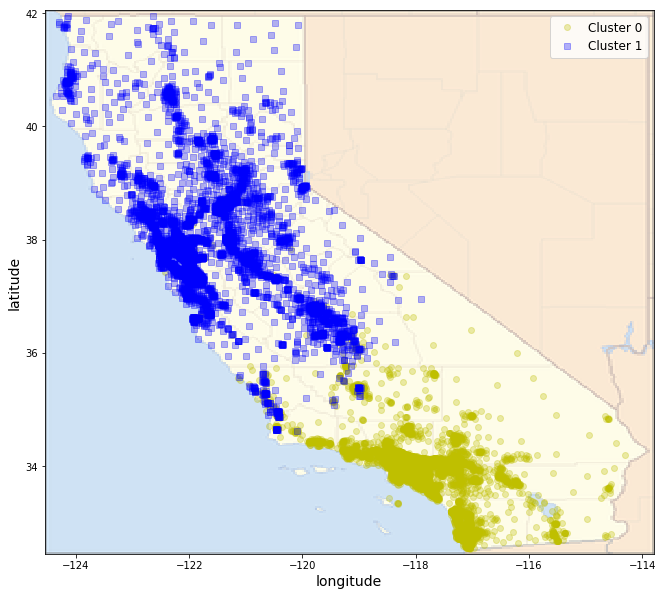

In [43]:
import matplotlib.pyplot as plt

y_pred = applyingclasses(X_house, cl,2)
#print(house[y_pred==0]["longitude"])


import matplotlib.image as mpimg
california_img=mpimg.imread('california map.png')
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.rcParams["figure.figsize"] = (20,3)
plt.plot(house[y_pred==0]["longitude"], house[y_pred==0]["latitude"], "yo", label="Cluster 0", alpha=0.3)
plt.plot(house[y_pred==1]["longitude"], house[y_pred==1]["latitude"], "bs", label="Cluster 1", alpha=0.3)
plt.xlabel("longitude", fontsize=14)
plt.ylabel("latitude", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

    The map clustering was able to produce 2 classes sl=plit by geography. The big difference being the upper california more rural areas vs. the heavily urbanized bay area and silicon valley. There is an area at -119 longitude and 35 latitude where both classes do intermingle. There is also an area next to the coast at -121 longitude and 25 latitude where they intermingle (though class 1 tends to dominate)

In [44]:
clten = Kmeans(X_house, 10)
clpdten = pd.DataFrame(clten, columns = names)
print("Doing 10 clusters/centroids")
print("the means per attribute per cluster is: ")
print(clpdten)

print("the sse per cluster is: ")
sdten = getsd(X_house, clten,10)
print(sdten)

print("the sse per attribute per cluster is: ")
sdaten = getsdatt(X_house, clten,10)
print(sdaten)


Doing 10 clusters/centroids
the means per attribute per cluster is: 
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.851729 -0.742577           -0.904431    -0.316458       -0.288120   
1  -0.185029 -0.047627           -0.023717     0.144863       -0.310528   
2   0.690281 -0.818257            0.182106    -0.145304       -0.289397   
3   0.830062 -0.810440           -0.485464     0.621188        0.826281   
4   0.147829 -0.130699           -0.980088     2.489617        2.591016   
5   0.320593 -0.258253           -1.452164     6.618563        6.262773   
6  -0.959873  1.218728            0.141120    -0.493255       -0.486990   
7  -1.042337  1.053884           -0.756671     0.526362        0.501880   
8  -1.306577  0.949628            0.819981    -0.275947       -0.339783   
9   0.740417 -0.768478            0.763101    -0.494438       -0.425202   

   population  households  median_income  median_house_value  
0   -0.286044   -0.313518      -0.242726  

In [116]:
print("The means nonscaled:")
print(pd.DataFrame(scaler.inverse_transform(clpdten),columns = names))

The means nonscaled:
    longitude   latitude  housing_median_age   total_rooms  total_bedrooms  \
0 -117.863279  34.045791           17.256988   1945.389237      416.006675   
1 -119.940406  35.530135           28.341001   2951.790257      406.608931   
2 -118.186739  33.884146           30.931338   2318.772887      415.470951   
3 -117.906690  33.900843           22.529795   3990.924115      883.365922   
4 -119.273532  35.352701           16.304833   8067.018587     1623.463445   
5 -118.927403  35.080260           10.363636  17074.571429     3163.331169   
6 -121.492793  38.234944           30.415512   1559.696962      332.604211   
7 -121.658009  37.882853           19.116588   3784.054028      747.318009   
8 -122.187410  37.660173           38.959154   2033.767900      394.340221   
9 -118.086292  33.990469           38.243301   1557.116268      358.516746   

    population   households  median_income  median_house_value  
0  1101.551106   379.675428       3.409546       151473

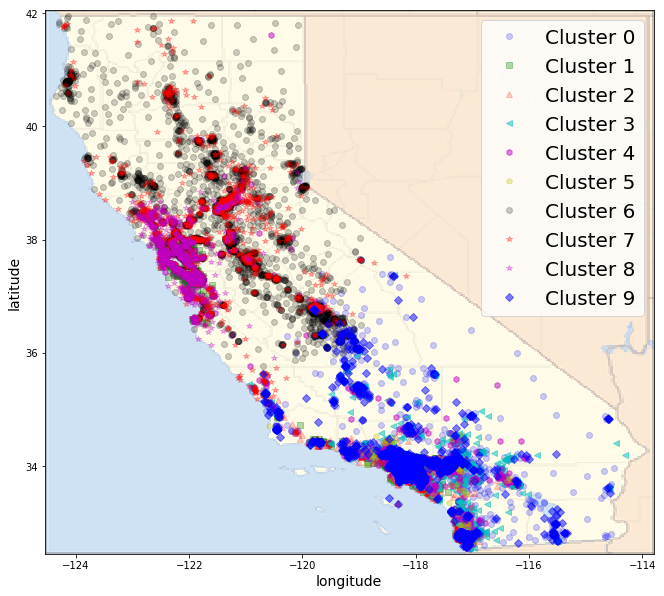

In [110]:
y_pred = applyingclasses(X_house, clten,10)

california_img=mpimg.imread('california map.png')
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.rcParams["figure.figsize"] = (30,10)
plt.plot(house[y_pred==0]["longitude"], house[y_pred==0]["latitude"], "bo", label="Cluster 0", alpha=0.2)
plt.plot(house[y_pred==1]["longitude"], house[y_pred==1]["latitude"], "gs", label="Cluster 1", alpha=0.3)
plt.plot(house[y_pred==2]["longitude"], house[y_pred==2]["latitude"], "r^", label="Cluster 2", alpha=0.2)
plt.plot(house[y_pred==3]["longitude"], house[y_pred==3]["latitude"], "c<", label="Cluster 3", alpha=0.5)
plt.plot(house[y_pred==4]["longitude"], house[y_pred==4]["latitude"], "mh", label="Cluster 4", alpha=0.5)
plt.plot(house[y_pred==5]["longitude"], house[y_pred==5]["latitude"], "yp", label="Cluster 5", alpha=0.3)
plt.plot(house[y_pred==6]["longitude"], house[y_pred==6]["latitude"], "ko", label="Cluster 6", alpha=0.2)
plt.plot(house[y_pred==7]["longitude"], house[y_pred==7]["latitude"], "r*", label="Cluster 7", alpha=0.3)
plt.plot(house[y_pred==8]["longitude"], house[y_pred==8]["latitude"], "m*", label="Cluster 8", alpha=0.3)
plt.plot(house[y_pred==9]["longitude"], house[y_pred==9]["latitude"], "bD", label="Cluster 9", alpha=0.5)
plt.xlabel("longitude", fontsize=14)
plt.ylabel("latitude", fontsize=14)
plt.legend(loc="upper right", fontsize=20)
plt.show()

Clusters 6 and 9 split the geography between north and south. Both generally exist in their splits of the map, with many 9 classes in the bay area. Cluster 4 is self contained around the san francisco area and north of it. Cluster 3 is in the souterhn part of the map with both rural locations and in the urban bay area. Cluster 7 is largey located in the north, concentrated in similar areas that cluster 6 are in. Cluster 6 seems to capture the same geography, but also captures the high population, high wealth, part of that geography. Cluster 0 is largely in more rural areas in the south. Cluster 1 can't really be seen on the map except in some isolated places in the south. From the means, it appears to capture the extremely high wealth (it has the highest mean for "median for income" by far) and the highest median house prices. Cluster 2 is similar to cluster 1 in that it captures high wealth areas in the south, but to a smaller extent. Cluster 5 is located near the bay area and captures low wealth, high population areas. 

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



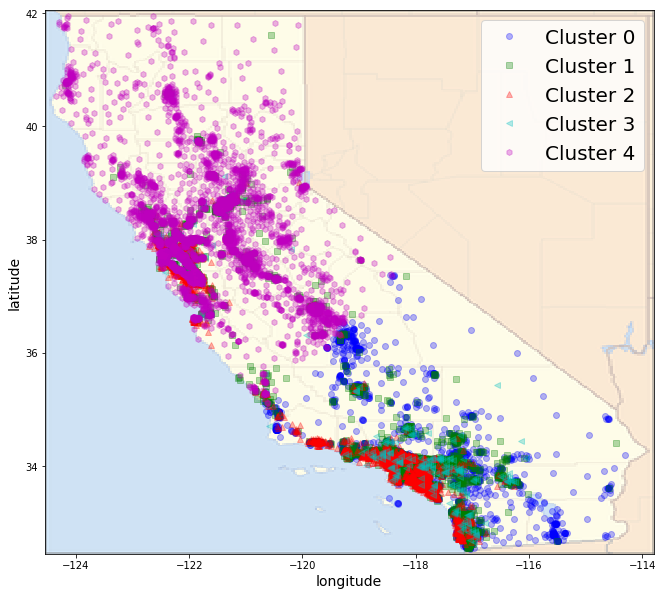

In [120]:
#ran different k's to search for clarity
cle = Kmeans(X_house, 5)

y_pred = applyingclasses(X_house, cle,5)

california_img=mpimg.imread('california map.png')
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.rcParams["figure.figsize"] = (30,10)
plt.plot(house[y_pred==0]["longitude"], house[y_pred==0]["latitude"], "bo", label="Cluster 0", alpha=0.3)
plt.plot(house[y_pred==1]["longitude"], house[y_pred==1]["latitude"], "gs", label="Cluster 1", alpha=0.3)
plt.plot(house[y_pred==2]["longitude"], house[y_pred==2]["latitude"], "r^", label="Cluster 2", alpha=0.3)
plt.plot(house[y_pred==3]["longitude"], house[y_pred==3]["latitude"], "c<", label="Cluster 3", alpha=0.3)
plt.plot(house[y_pred==4]["longitude"], house[y_pred==4]["latitude"], "mh", label="Cluster 4", alpha=0.3)
#plt.plot(house[y_pred==5]["longitude"], house[y_pred==5]["latitude"], "yp", label="Cluster 5", alpha=0.3)
#plt.plot(house[y_pred==6]["longitude"], house[y_pred==6]["latitude"], "ko", label="Cluster 6", alpha=0.2)
#plt.plot(house[y_pred==7]["longitude"], house[y_pred==7]["latitude"], "r*", label="Cluster 7", alpha=0.3)
#plt.plot(house[y_pred==8]["longitude"], house[y_pred==8]["latitude"], "m*", label="Cluster 8", alpha=0.3)
#plt.plot(house[y_pred==9]["longitude"], house[y_pred==9]["latitude"], "bD", label="Cluster 9", alpha=0.5)
plt.xlabel("longitude", fontsize=14)
plt.ylabel("latitude", fontsize=14)
plt.legend(loc="upper right", fontsize=20)
plt.show()

In general, the 10 clusters seemed to be the best at capturin individual markets. There are three large sort of geographic areas. The first is around the bay, the second is around SF and to the north of it, and the third is an urban strip to the east of SF. There is a long rural area on the west side of the state. There is an extremely wealthly clustor in SF and the bay area (and possibly silicon valley) that is contains median house prices and median incomes much higher than any other group. The urban area to the west of SF contains two markets in the same geography. The first involves newly built houses and low cost housing, the second involves high incomes and high cost housing. Part of the crisis is the urban areas with high populations containing both those low price and the high price housing. With a wide inequality in wages, this leads to issues in how the housing supply is expanded (building of luxury apartments and other high wealth areas) that hurt the affordability of housing in general in the state.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 3:...".

Best of luck and have fun!